In [1]:
#For Data
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from __future__ import division

/Users/sameulnasir/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
import requests
from StringIO import StringIO

In [3]:
# This is the url link for the poll data in csv form
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# Use requests to get the information in text form
source = requests.get(url).text

# Use StringIO to avoid an IO error with pandas
poll_data = StringIO(source) 

In [4]:
poll_df = pd.read_csv(poll_data)

In [5]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 589 entries, 0 to 588
Data columns (total 14 columns):
Pollster                  589 non-null object
Start Date                589 non-null object
End Date                  589 non-null object
Entry Date/Time (ET)      589 non-null object
Number of Observations    567 non-null float64
Population                589 non-null object
Mode                      589 non-null object
Obama                     589 non-null int64
Romney                    589 non-null int64
Undecided                 422 non-null float64
Pollster URL              589 non-null object
Source URL                587 non-null object
Partisan                  589 non-null object
Affiliation               589 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 69.0+ KB


In [6]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


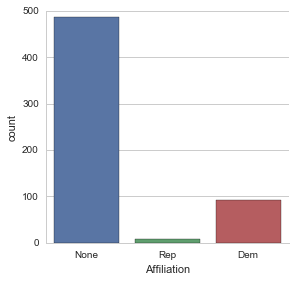

In [8]:
sns.factorplot('Affiliation', data = poll_df, kind= 'count')

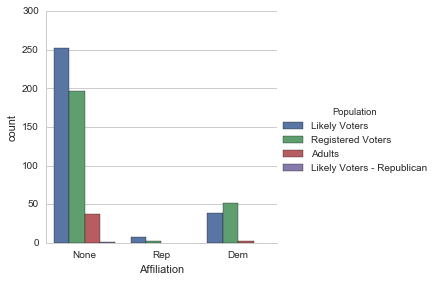

In [11]:
sns.factorplot('Affiliation', data=poll_df, hue='Population',kind='count')

In [12]:
poll_df.mean()

Number of Observations    1296.197531
Obama                       46.772496
Romney                      44.573854
Undecided                    6.549763
dtype: float64

In [13]:
avg = DataFrame(poll_df.mean())

In [18]:
avg.drop('Number of Observations', axis=0, inplace=True)

In [19]:
avg

,0
Obama,46.772496
Romney,44.573854
Undecided,6.549763


In [20]:
std = DataFrame(poll_df.std())

In [21]:
std.drop('Number of Observations', axis = 0, inplace=True)

In [22]:
std

,0
Obama,2.448627
Romney,2.927711
Undecided,3.702235


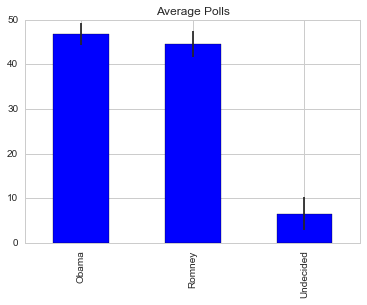

In [33]:
#Total poll results avg.

avg.plot(yerr=std, kind="bar", legend=False, title="Average Polls")

In [25]:
sum = DataFrame(poll_df.sum())

In [27]:
sum.drop('Number of Observations', axis=0,inplace=True)

In [28]:
sum

,0
Obama,27549
Romney,26254
Undecided,2764


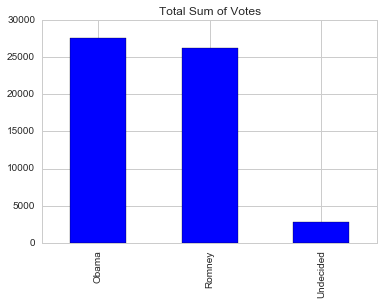

In [32]:
#Poll results Sum
sum.plot(kind='bar',legend=False, title="Total Sum of Votes")


In [35]:
poll_avg=pd.concat([avg,std], axis=1)

In [37]:
poll_avg.columns=['AVG','STD']

poll_avg

,AVG,STD
Obama,46.772496,2.448627
Romney,44.573854,2.927711
Undecided,6.549763,3.702235


In [38]:
#For timestamps

from datetime import datetime

In [39]:
poll_df['Difference'] = (poll_df['Obama']-poll_df['Romney'])/100

In [40]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06 2000-01-01 08:40:26 UTC,1000,Likely Voters,Live Phone,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05 2000-01-01 18:30:15 UTC,3000,Likely Voters,Live Phone,49,48,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,0.01
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06 2000-01-01 09:22:02 UTC,872,Likely Voters,Automated Phone,48,48,4,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,JZ Analytics/Newsmax,2012-11-03,2012-11-05,2012-11-06 2000-01-01 07:38:41 UTC,1041,Likely Voters,Internet,47,47,6,http://elections.huffingtonpost.com/pollster/p...,http://www.jzanalytics.com/,Sponsor,Rep,0.00
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06 2000-01-01 08:47:50 UTC,1500,Likely Voters,Automated Phone,48,49,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


In [41]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

In [42]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403,44,44,12,0.00
1,2009-04-17,686,50,39,11,0.11
2,2009-05-14,1000,53,35,12,0.18
3,2009-06-12,638,48,40,12,0.08
4,2009-07-15,577,49,40,11,0.09


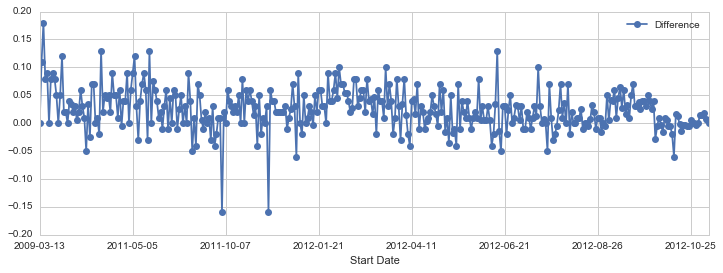

In [44]:
#Voter Sentiment Over time

poll_df.plot('Start Date','Difference', figsize=(12,4), marker='o')

In [49]:
row_in = 0
xlim = []

for date in poll_df['Start Date']:
    if date[0:7] =="2012-10":
        xlim.append(row_in)
        row_in += 1
    
    else:
        row_in += 1

print max(xlim)
print min(xlim)

356
329


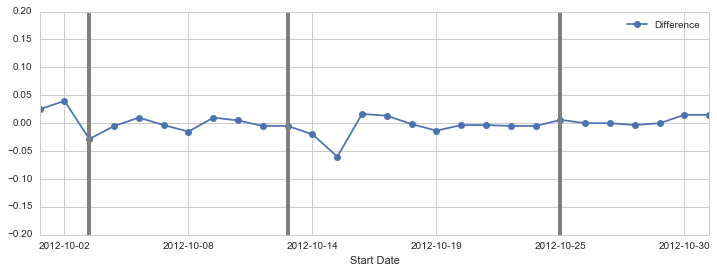

In [52]:
#Poll Sentiment after October Debtates 

poll_df.plot('Start Date','Difference', figsize=(12,4), marker='o', xlim=(329,356))

plt.axvline(329+2, linewidth=4, color='gray')
plt.axvline(329+10, linewidth=4, color='gray')
plt.axvline(329+21, linewidth=4, color='gray')